In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
import shutil
from PIL import Image

# HAM10000 DATASET BACKGROUND (Human Against Machine with 10000 training images)
    # These images primarily originated from Cliff Rosendahl’s skin cancer practice in Queensland, Australia, and the 
    # Dermatology Department of the Medical University of Vienna, Austria. Collected from diverse populations, 
    # various acquisition and cleaning methods were employed, along with the development of semi-automatic 
    # workflows, to address diversity issues. The dataset contains 10,015 images categorized into seven skin disease 
    # groups: 327 actinic keratosis and intraepithelial carcinoma images, 514 basal cell carcinoma images, 1099 benign 
    # keratosis images, 115 dermatofibroma images, 1113 melanoma images, 6705 melanocytic nevus images, and 142 
    # vascular malformation images (included in ISIC2018)

In [5]:
df = pd.read_csv("GroundTruth.csv")
meta_data = pd.read_csv("HAM10000_metadata.csv")

In [3]:
# read the data
print(df.head())
print(f"total images: {df.shape[0]}")

          image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
0  ISIC_0024306  0.0  1.0  0.0    0.0  0.0  0.0   0.0
1  ISIC_0024307  0.0  1.0  0.0    0.0  0.0  0.0   0.0
2  ISIC_0024308  0.0  1.0  0.0    0.0  0.0  0.0   0.0
3  ISIC_0024309  0.0  1.0  0.0    0.0  0.0  0.0   0.0
4  ISIC_0024310  1.0  0.0  0.0    0.0  0.0  0.0   0.0
total images: 10015


In [6]:
# class distribution
class_counts = df.iloc[:, 1:].sum().sort_values(ascending=False)
print(class_counts)

NV       6705.0
MEL      1113.0
BKL      1099.0
BCC       514.0
AKIEC     327.0
VASC      142.0
DF        115.0
dtype: float64


In [7]:
# get class name
class_names = class_counts.index.to_list()
print(class_names)

['NV', 'MEL', 'BKL', 'BCC', 'AKIEC', 'VASC', 'DF']


In [8]:
# Create a 'label' column from one-hot encoding
df['label'] = df.iloc[:, 1:].idxmax(axis=1)
print(df[['image', 'label']].head())

print(df)

          image label
0  ISIC_0024306    NV
1  ISIC_0024307    NV
2  ISIC_0024308    NV
3  ISIC_0024309    NV
4  ISIC_0024310   MEL
              image  MEL   NV  BCC  AKIEC  BKL   DF  VASC label
0      ISIC_0024306  0.0  1.0  0.0    0.0  0.0  0.0   0.0    NV
1      ISIC_0024307  0.0  1.0  0.0    0.0  0.0  0.0   0.0    NV
2      ISIC_0024308  0.0  1.0  0.0    0.0  0.0  0.0   0.0    NV
3      ISIC_0024309  0.0  1.0  0.0    0.0  0.0  0.0   0.0    NV
4      ISIC_0024310  1.0  0.0  0.0    0.0  0.0  0.0   0.0   MEL
...             ...  ...  ...  ...    ...  ...  ...   ...   ...
10010  ISIC_0034316  1.0  0.0  0.0    0.0  0.0  0.0   0.0   MEL
10011  ISIC_0034317  1.0  0.0  0.0    0.0  0.0  0.0   0.0   MEL
10012  ISIC_0034318  0.0  0.0  0.0    0.0  1.0  0.0   0.0   BKL
10013  ISIC_0034319  0.0  1.0  0.0    0.0  0.0  0.0   0.0    NV
10014  ISIC_0034320  0.0  1.0  0.0    0.0  0.0  0.0   0.0    NV

[10015 rows x 9 columns]


C:\Users\chans\AppData\Local\Temp\ipykernel_8548\1520965850.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= class_names, y= class_counts.values, palette="tab10")


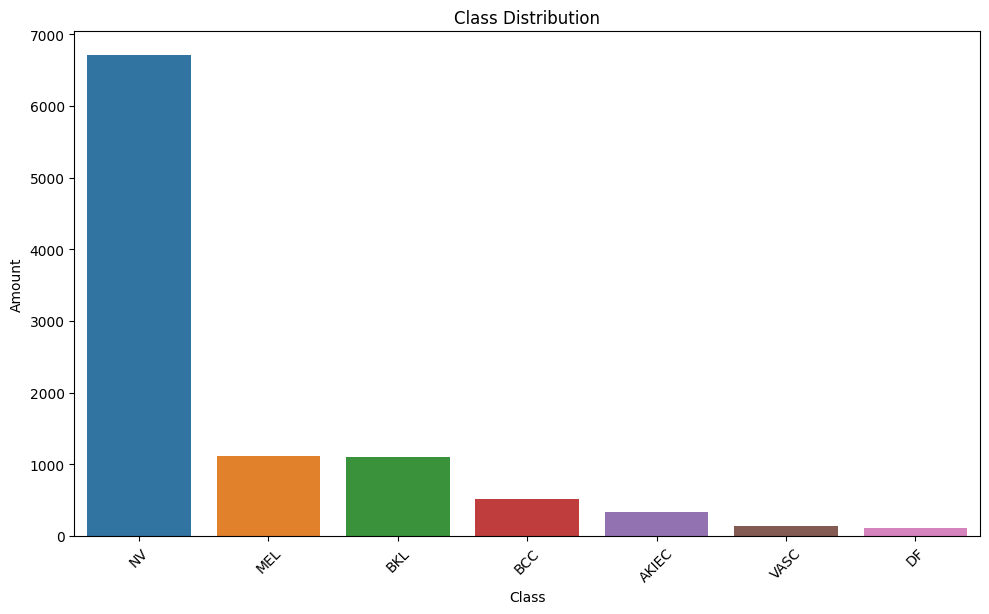

In [45]:
# visualize the data
plt.figure(figsize=(10,6))
sns.barplot(x= class_names, y= class_counts.values, palette="tab10")

plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Amount")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [ ]:
#DONT RUN 2nd time
# handling directories
output_dir = 'dataset_sorted'
for class_name in class_names:
    # raise exist True, means it's okay if the directory is alr exist
    os.makedirs(os.path.join(output_dir, class_name), exist_ok=True)

In [ ]:
# DONT RUN 2nd time
# copy images into Class Folders 
image_folders = 'images' # where ISIC_xxxxx.jpg images originally at now

for idx, row in df.iterrows():
    filename = row['image'] + ".jpg"
    label = row['label']
    src_path = os.path.join(image_folders, filename)
    dst_path = os.path.join(output_dir, label, filename)
    
    if os.path.exists(src_path):
        shutil.copy(src_path, dst_path)
    else:
        print(f"Missing: {src_path}")

In [ ]:
# DONT RUN 2nd time
for class_folder in os.listdir(output_dir):
    class_path = os.path.join(output_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if f.endswith('.jpg')])
        print(f"Class: {class_folder}, Image Count: {num_images}")

Class: AKIEC, Image Count: 327
Class: BCC, Image Count: 514
Class: BKL, Image Count: 1099
Class: DF, Image Count: 115
Class: MEL, Image Count: 1113
Class: NV, Image Count: 6705
Class: VASC, Image Count: 142


# apply dull razor algorithm before splitting the dataset

In [ ]:
# DONT RUN 2nd time
import cv2 as cv
import numpy as np
import os

# define input and output folders path
input_folder = 'dataset_sorted' # Folder containing class , subfolders with images
output_folder = 'preprocessed_images' # Folder to save processed images

#ensure the output directory exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    
#function to apply dull razor algorithm to an image
def dull_razor(image):
    # convert to grayscale
    grayScale = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    
    # blackhat filtering
    kernel = cv.getStructuringElement(1,(11,11))
    blackhat = cv.morphologyEx(grayScale, cv.MORPH_BLACKHAT, kernel)
    
    # gaussian blue
    bhg = cv.GaussianBlur(blackhat, (3,3), cv.BORDER_DEFAULT)
    
    # binary tresholding (mask)
    _, mask = cv.threshold(bhg, 10, 255, cv.THRESH_BINARY)
    
    # apply dilation before inpainting
    kernel_dilate = np.ones((9,9), np.uint8)
    
    # if you want to use the dilated mask for inpainting 
    # should pass dilated_mask instead of mask to cv.inpaint.
    dilated_mask = cv.dilate(mask, kernel_dilate, iterations=1)
    
    # inpainting
    dst = cv.inpaint(image, mask, 6, cv.INPAINT_TELEA)
    
    return dst

# process all images in all subdirectories
for root , dirs , files in os.walk(input_folder):
    for file in files:
        if file.endswith('.jpg'):
            input_path = os.path.join(root, file)
            
            # read image
            image = cv.imread(input_path, cv.IMREAD_COLOR)
            
            # apply dull razor algorithm
            cleaned_image = dull_razor(image)
            
            # create corresponding output path
            relative_path = os.path.relpath(input_path, input_folder)
            output_path = os.path.join(output_folder,relative_path)
            
            # ensure output directory exists
            os.makedirs(os.path.dirname(output_path), exist_ok=True)
            
            # save the cleaned image 
            cv.imwrite(output_path,cleaned_image)
            
            print(f"Processed and saved : {output_path}")
        
print("All images processed successfully")

Processed and saved : preprocessed_metadata_images\AKIEC\ISIC_0024329.jpg
All images processed successfully
Processed and saved : preprocessed_metadata_images\AKIEC\ISIC_0024372.jpg
All images processed successfully
Processed and saved : preprocessed_metadata_images\AKIEC\ISIC_0024418.jpg
All images processed successfully
Processed and saved : preprocessed_metadata_images\AKIEC\ISIC_0024450.jpg
All images processed successfully
Processed and saved : preprocessed_metadata_images\AKIEC\ISIC_0024463.jpg
All images processed successfully
Processed and saved : preprocessed_metadata_images\AKIEC\ISIC_0024468.jpg
All images processed successfully
Processed and saved : preprocessed_metadata_images\AKIEC\ISIC_0024470.jpg
All images processed successfully
Processed and saved : preprocessed_metadata_images\AKIEC\ISIC_0024511.jpg
All images processed successfully
Processed and saved : preprocessed_metadata_images\AKIEC\ISIC_0024517.jpg
All images processed successfully
Processed and saved : prepro

# use the preprocessed_dataset (have done with dull razor algorithm)

In [1]:
# For compare reason
# Set our directories
old_dir = 'dataset_sorted'
data_dir = 'preprocessed_images'

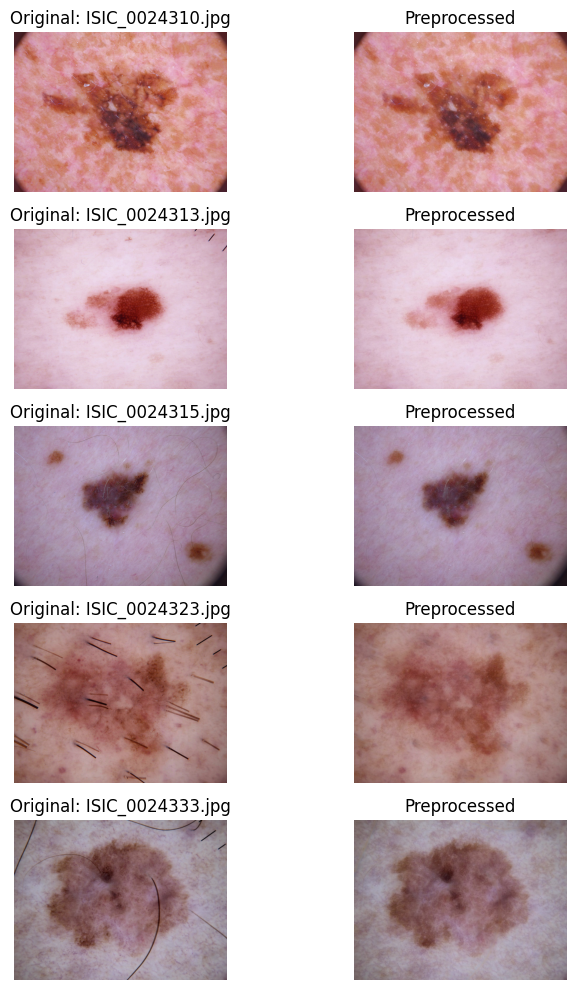

In [ ]:
# Set class name
cls = 'MEL'

# Get list of common filenames (ensure images exist in both folders)
filenames = os.listdir(f'dataset_sorted/{cls}')
filenames = [f for f in filenames if os.path.exists(f'preprocessed_images/{cls}/{f}')]

# SET 5 pairs
num_pairs = 5
filenames = filenames[:num_pairs]

# Create a plot with 4 rows and 2 columns (original, preprocessed)
fig, axes = plt.subplots(num_pairs, 2, figsize=(8, 2 * num_pairs))

for i, filename in enumerate(filenames):
    # Load images
    old_img = Image.open(f'dataset_sorted/{cls}/{filename}')
    new_img = Image.open(f'preprocessed_images/{cls}/{filename}')

    # Plot original
    axes[i, 0].imshow(old_img)
    axes[i, 0].set_title(f'Original: {filename}')
    axes[i, 0].axis('off')

    # Plot preprocessed
    axes[i, 1].imshow(new_img)
    axes[i, 1].set_title('Preprocessed')
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

# since we used train_test_split function, so this already guarantees the Stratified Split 

In [9]:
output_dir = 'split_dir'

# Set split proportions (70%-15%-15%)
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Ensure output directory is clean
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

# Set up output folders
for split in ['train', 'val', 'test']:
    for cls in os.listdir(data_dir):
        os.makedirs(os.path.join(output_dir, split, cls), exist_ok=True)

# Walk through each class
for cls in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, cls)
    images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    # Shuffle and split
    train_imgs, temp_imgs = train_test_split(images, test_size=(1 - train_ratio), random_state=42, stratify=None)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=(test_ratio / (val_ratio + test_ratio)), random_state=42)

    # Copy files
    for img in train_imgs:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'train', cls, img))
    for img in val_imgs:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'val', cls, img))
    for img in test_imgs:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'test', cls, img))

print("✅ Dataset split completed.")

✅ Dataset split completed.


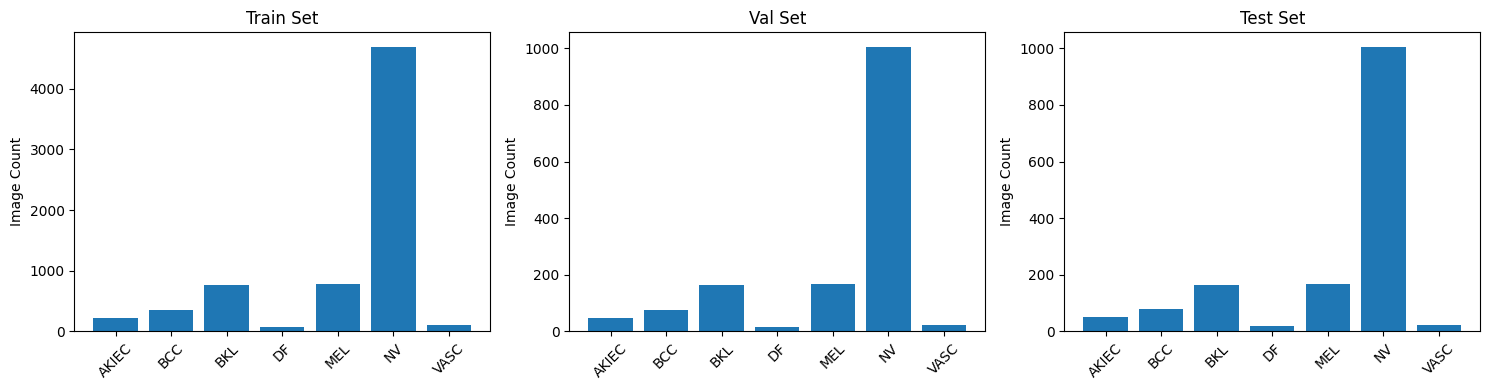

In [10]:
split_dir = 'split_dir'
splits = ['train', 'val', 'test']
class_counts = {split: {} for split in splits}

# Count images per class in each split
for split in splits:
    split_path = os.path.join(split_dir, split)
    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)
        count = len([f for f in os.listdir(cls_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
        class_counts[split][cls] = count

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, split in enumerate(splits):
    classes = list(class_counts[split].keys())
    counts = list(class_counts[split].values())
    axes[i].bar(classes, counts)
    axes[i].set_title(f'{split.capitalize()} Set')
    axes[i].set_ylabel('Image Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [2]:
train_dir =  "split_dir/train"
train_classes = os.listdir(train_dir)
print(train_classes)

['AKIEC', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'VASC']


In [12]:
# count the number of images per class
def count_images_by_class(directory):
  class_counts = {}
  for class_name in os.listdir(directory):
    class_path = os.path.join(directory, class_name)
    if os.path.isdir(class_path):
      class_counts[class_name] = len(os.listdir(class_path))
  return class_counts

In [13]:
train_counts = count_images_by_class(train_dir)
print(train_counts)

{'AKIEC': 228, 'BCC': 359, 'BKL': 769, 'DF': 80, 'MEL': 779, 'NV': 4693, 'VASC': 99}


C:\Users\chans\AppData\Local\Temp\ipykernel_1844\3631823428.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="tab10")


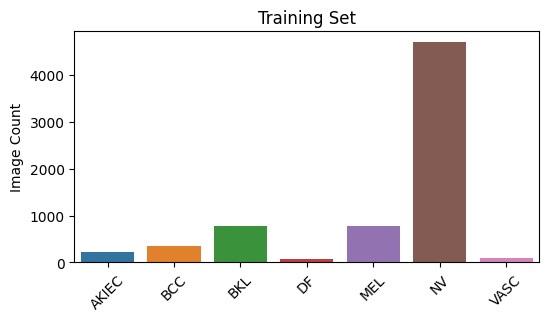

In [14]:
# plot counts for train and test set
def plot_class_counts(class_counts, title):
  plt.figure(figsize=(6,3))
  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="tab10")
  plt.title(title)
  plt.ylabel("Image Count")
  plt.xticks(rotation=45)
  plt.show()

# display
plot_class_counts(train_counts, "Training Set")

    the dataset is highly imbalance, I do "Hybrid Resampling" which is a method that combine oversampling and undersampling techniques to address class imbalance 

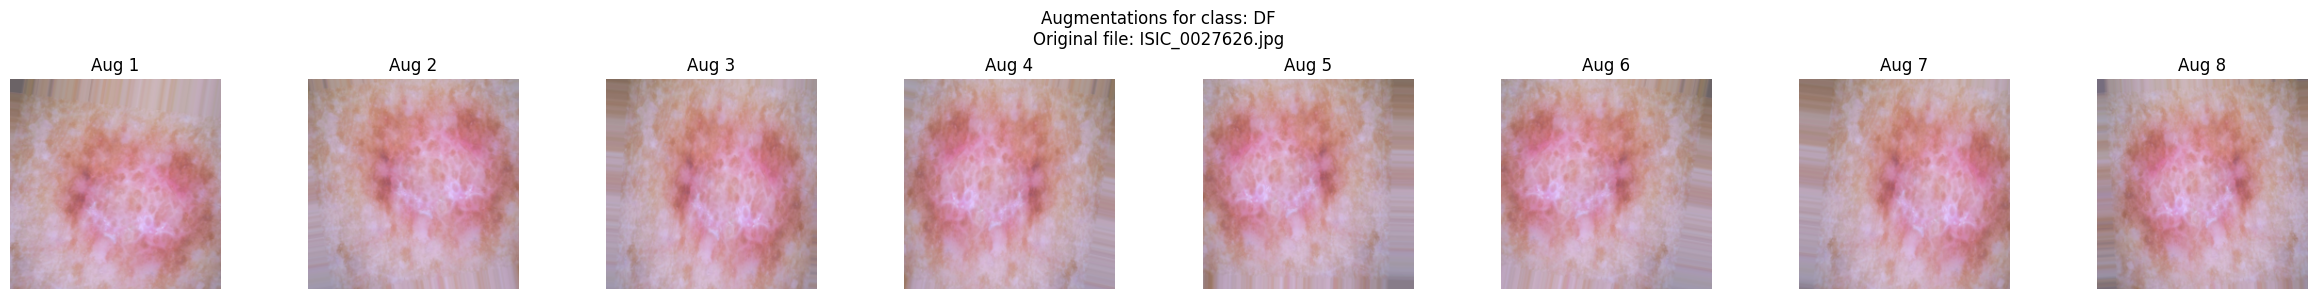

In [ ]:
# Define augmentation generator
augmenter = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
    # fill_mode='reflect'
    # brightness_range=(0.8, 1.2)    # ±20% constrast
)

# Visualization function
def preview_augmentation(train_dir, class_name, num_images=5):
    class_path = os.path.join(train_dir, class_name)
    img_name = np.random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, img_name)
    
    # Load and prepare image
    img = Image.open(img_path)
    img = img.resize((224, 224))  # Resize if needed for uniformity
    img_array = np.expand_dims(np.array(img), 0)  # Add batch dimension

    # Generate augmented samples
    aug_iter = augmenter.flow(img_array, batch_size=1)

    # Plot
    plt.figure(figsize=(num_images * 3, 3))
    for i in range(num_images):
        aug_img = next(aug_iter)[0].astype(np.uint8)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(aug_img)
        plt.title(f"Aug {i+1}")
        plt.axis('off')
    plt.suptitle(f"Augmentations for class: {class_name}\nOriginal file: {img_name}")
    plt.tight_layout()
    plt.show()

# Example usage:
preview_augmentation(train_dir='split_dir/train', class_name='DF', num_images=8)

In [ ]:
# Setup
train_dir = "split_dir/train"
output_dir = "augmented_trainset"
target_count = 3000
image_exts = ('.jpg', '.jpeg', '.png')

# Define augmentation generator
augmenter = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create output directory
os.makedirs(output_dir, exist_ok=True)

# Loop through classes
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(image_exts)]
    num_images = len(image_files)

    # Create output class folder
    class_out_dir = os.path.join(output_dir, class_name)
    os.makedirs(class_out_dir, exist_ok=True)

    if num_images >= target_count:
        # If class has more than 3000, randomly pick 3000 and copy
        selected_files = random.sample(image_files, target_count)
        for fname in selected_files:
            src = os.path.join(class_path, fname)
            dst = os.path.join(class_out_dir, fname)
            shutil.copy2(src, dst)
    else:
        # Copy all original images first
        for fname in image_files:
            shutil.copy2(os.path.join(class_path, fname), os.path.join(class_out_dir, fname))

        # Augment more to reach 3000
        num_to_generate = target_count - num_images
        print(f"Augmenting {num_to_generate} for class: {class_name}")

        i = 0
        while i < num_to_generate:
            img_name = random.choice(image_files)
            img_path = os.path.join(class_path, img_name)

            # Load and expand dims to mimic batch
            img = Image.open(img_path)
            img_array = np.array(img)
            img_array = np.expand_dims(img_array, 0)

            # Create generator and save images
            aug_iter = augmenter.flow(img_array, batch_size=1)
            aug_img = next(aug_iter)[0].astype(np.uint8)

            # Save augmented image
            aug_img_pil = Image.fromarray(aug_img)
            aug_img_pil.save(os.path.join(class_out_dir, f"aug_{i}_{img_name}"))
            i += 1

print("✅ Augmentation completed. All classes now have 3000 images.")


Augmenting 2772 for class: AKIEC
Augmenting 2641 for class: BCC
Augmenting 2231 for class: BKL
Augmenting 2920 for class: DF
Augmenting 2221 for class: MEL
Augmenting 2901 for class: VASC
✅ Augmentation completed. All classes now have 1000 images.
